In [89]:
# import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# data read
df = pd.read_csv('dataset.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'

# check
print('data 확인')
df.head()

data 확인


,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),층,계약년월,계약일,건축년도
0,서울특별시강남구개포동,일반,1***,논현로,준주거,제2종근린생활,25m이상,381.42,367.3,"550,000",NaN,201708,23,1993.0
1,서울특별시강남구개포동,일반,1**,선릉로10길,준주거,제2종근린생활,8m미만,535.20,207.8,"390,000",NaN,201708,29,1987.0
2,서울특별시강남구개포동,집합,1*,개포로,일반상업,판매,25m이상,17.64,NaN,"39,500",1.0,201709,4,1997.0
3,서울특별시강남구개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,82.70,NaN,"60,000",NaN,201709,14,1984.0
4,서울특별시강남구개포동,집합,1**,개포로,제3종일반주거,제1종근린생활,25m이상,9.00,NaN,"15,000",1.0,201709,27,1983.0


In [90]:
import datetime
import math
#################################################################################
# TODO: 데이터 타입 처리                                                        #
#                                                                               #
# 1. 계약 년월, 계약일을 datetime 형식으로 변환 (datetime.datetime 함수 사용)   #
# 2. 건축년도 nan 값 처리 및 datetime 형식으로 변환 (datetime.datetime 함수사용)#
# 3. 거래금액 string -> float 로 형변환 (Dataframe.apply 사용)                  #
# 4. 변수명은 계약년월_adj, 건축년도_adj, '거래금액(만원)_adj' 저장             #
#################################################################################

#계약년월 to datetime64
import datetime
import math

def change_type(df_):
#1. 계약 년월, 계약일을 datetime 형식으로 변환 (datetime.datetime 함수 사용)
    contract_yr = []
    for i, j in np.array(df_[['계약년월', '계약일']]):
        contract_yr.append(datetime.datetime(int(str(i)[:4]), int(str(i)[4:6]), j))
    df_['계약년월_adj'] = contract_yr
# 2. 건축년도 nan 값 처리 및 datetime 형식으로 변환 (datetime.datetime 함수사용)
    construct_yr =[]
    for i in np.array(df_['건축년도']):
        if(math.isnan(i)):
            construct_yr.append(i)
        elif(i==0):
            construct_yr.append(np.nan)
        else:
            construct_yr.append(datetime.datetime(int(str(int(i))[:4]),1,1))

    df_['건축년도_adj']=construct_yr

# 3. 거래금액 string -> float 로 형변환 (Dataframe.apply 사용)
    df_['거래금액(만원)_adj']=df_['거래금액(만원)'].str.replace(',', '').astype('float64')
    
    return df_

df = change_type(df)

In [91]:
# 각 컬럼별로 null 값의 비율을 확인
for i in df.columns :
    X_i = df.loc[:,i].replace('-', np.nan) # 도로조건은 -가 null 값 (데이터를 출력하여 확인 필요)
    print("column {} : {} not null ratio".format(i,X_i.dropna().shape[0]/df.shape[0]))
    print(df.loc[:,i].unique())
    print("")
    print()
    
    

column 시군구 : 1.0 not null ratio
['서울특별시강남구개포동' '서울특별시강남구논현동' '서울특별시강남구대치동' '서울특별시강남구도곡동' '서울특별시강남구삼성동'
 '서울특별시강남구세곡동' '서울특별시강남구수서동' '서울특별시강남구신사동' '서울특별시강남구압구정동' '서울특별시강남구역삼동'
 '서울특별시강남구일원동' '서울특별시강남구자곡동' '서울특별시강남구청담동' '서울특별시강동구강일동' '서울특별시강동구고덕동'
 '서울특별시강동구길동' '서울특별시강동구둔촌동' '서울특별시강동구명일동' '서울특별시강동구상일동' '서울특별시강동구성내동'
 '서울특별시강동구암사동' '서울특별시강동구천호동' '서울특별시강북구미아동' '서울특별시강북구번동' '서울특별시강북구수유동'
 '서울특별시강북구우이동' '서울특별시강서구가양동' '서울특별시강서구공항동' '서울특별시강서구내발산동' '서울특별시강서구등촌동'
 '서울특별시강서구마곡동' '서울특별시강서구방화동' '서울특별시강서구염창동' '서울특별시강서구화곡동' '서울특별시관악구남현동'
 '서울특별시관악구봉천동' '서울특별시관악구신림동' '서울특별시광진구광장동' '서울특별시광진구구의동' '서울특별시광진구군자동'
 '서울특별시광진구능동' '서울특별시광진구자양동' '서울특별시광진구중곡동' '서울특별시광진구화양동' '서울특별시구로구가리봉동'
 '서울특별시구로구개봉동' '서울특별시구로구고척동' '서울특별시구로구구로동' '서울특별시구로구궁동' '서울특별시구로구신도림동'
 '서울특별시구로구오류동' '서울특별시구로구온수동' '서울특별시구로구천왕동' '서울특별시구로구항동' '서울특별시금천구가산동'
 '서울특별시금천구독산동' '서울특별시금천구시흥동' '서울특별시노원구공릉동' '서울특별시노원구상계동' '서울특별시노원구월계동'
 '서울특별시노원구중계동' '서울특별시노원구하계동' '서울특별시도봉구도봉동' '서울특별시도봉구방학동' '서울특별시도봉구쌍문동'
 '서울특별시도봉구창동' '서울특별시동대문구답십리동' '서울특별시동대문구신설동' '

In [92]:
#################################################################################
# TODO: 합리적인 방법으로 Null 값을 처리                                        #
#                                                                               #
# 1. '대지면적(㎡)'은 거의다 비어있으므로 사용하지 않고                         #
# 2. '층'과 '도로조건'은 비어있는 값들을 최빈값을 대체 (DataFrame.replace 사용) # 
# 3. 건축년도가 비어있는 행은 제거 (index.isin 사용)                            #
# 4. 주요변수 전부 헨들링 되었으므로 그 외 nan이 존재하는 행은 드랍    
# 5. 다른 방법도 주석과 함께 제시 해볼 것.                                      #
#################################################################################
df_1 = df.copy()

def handling_nan(df_):
#1 대지면적 열 삭제
    df_ = df_.drop(['대지면적(㎡)'],axis=1)

#2 '층'과 '도로조건' 비어있는 값들을 최빈값 대체
    df_ = df_.replace({'층': np.nan}, {'층': df_['층'].mode()[0]})
    df_ = df_.replace({'도로조건': np.nan}, {'도로조건': df_['도로조건'].mode()[0]})

#3 건축년도 비어있는 행 제거 : 
    df_ = df_.dropna(subset=['건축년도'])

#4 주요변수 전부 헨들링 되었으므로 그 외 nan이 존재하는 행은 드랍
    df_ = df_.dropna()

    return df_

df_1 = handling_nan(df_1)

In [93]:
### Column이 한글이면 에러가 발생할 수 있으므로 영문으로 사용하는 것을 추천 (아래 코드는 한글 폰트 사용)
### 각 plot 함수는 dataframe과 columns을 인풋으로 받아서 변수의 그림 출력
### plotHistogram은 histogram, plotPairplot은 컬럼별 scatter plot, plotBoxplot은 기준 컬럼(범주형 변수)에 대한 box plot
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

def plotHistogram(_df, columns):
    if type(columns) != list :
        print("columns 타입이 리스트가 아닙니다.")
    
        return
    
    for _n, i in enumerate(columns):
        df.describe()
        fig=plt.figure(figsize=(20,8))
        fig.patch.set_facecolor('xkcd:white')

        plt.subplot(2,3,_n + 1)
        plt.title(i)
        df.loc[:,i].hist(bins=50)
    plt.show()
        
        
def plotPairplot(_df, columns):
    if type(columns) != list :
        print("columns 타입이 리스트가 아닙니다.")
    
        return
    sns.pairplot(_df.loc[:,columns])
    plt.show()

        
def plotBoxplot(_df, basis_col1, y_col2):
    _unique = _df.loc[:, basis_col1].unique()
    if len(_unique) < 50:
        print("기준 컬럼의 종류가 너무 많습니다.(50개 이상)")
    
    box_plot=[]
    count_ = []
    for n,i in enumerate(_unique):
        box_plot.append(list(_df[_df.loc[:, basis_col1]==i].loc[:, y_col2]))
        count_.append(len((list(_df[_df.loc[:, basis_col1]==i].loc[:, y_col2]))))

    print('Count   ',count_)
    plt.boxplot(box_plot, flierprops=dict(markerfacecolor='g', marker='D'));
    plt.xticks(range(1,len(_unique)+1),_unique)

Count    [32578, 310, 220, 859, 1252, 158, 3712, 440, 305, 436, 471, 239, 2144, 168, 19, 26, 44, 50, 645, 187, 41, 101, 75, 211, 94, 68, 24, 18, 11, 9, 8, 9, 15, 14, 4, 77, 125, 153, 42, 222, 28, 30, 160, 85, 5, 8, 9, 8, 2, 45, 36, 4, 7, 4, 3, 2, 4, 1, 1, 1, 2, 2, 1]


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


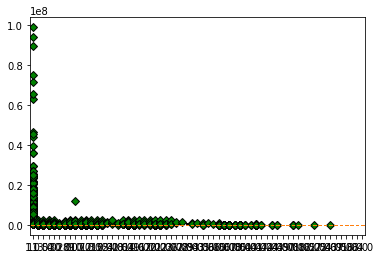

In [94]:
plotBoxplot(df_1, '층', '거래금액(만원)_adj')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-pa

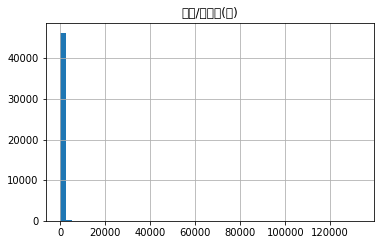

D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52789 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 52789 missing from current font.
  font.load_char(ord(s), flags=flags)


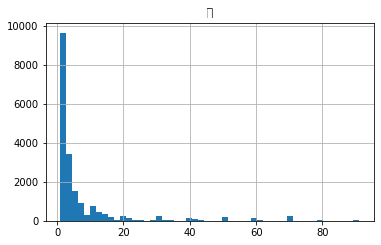

D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50557 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51068 missing from

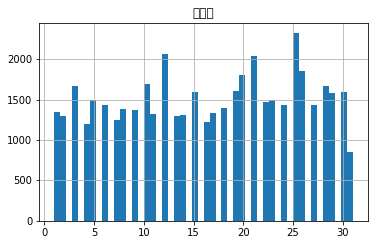

In [95]:
plotHistogram(df_1, ['전용/연면적(㎡)', '층', '계약일'])

D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing 

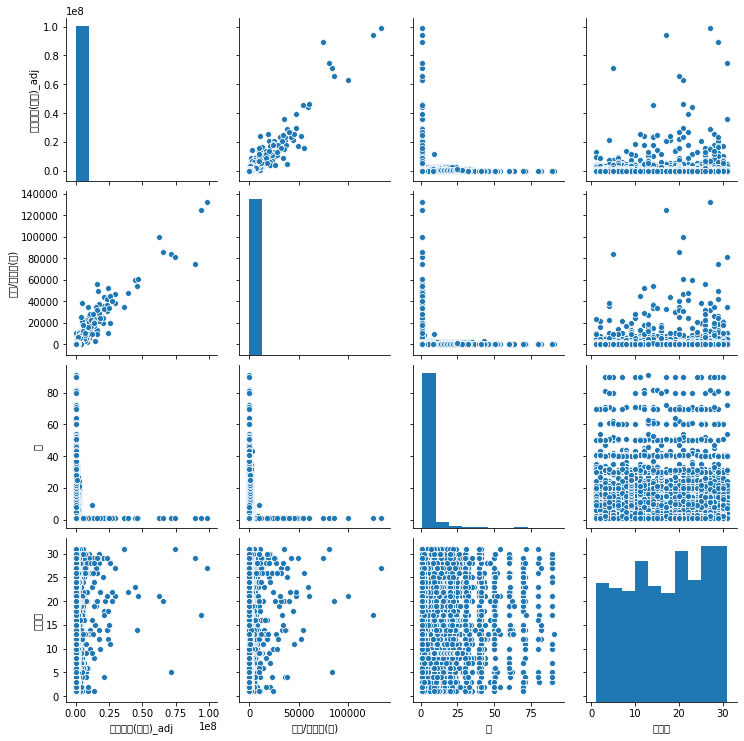

In [96]:
plotPairplot(df_1, ['거래금액(만원)_adj', '전용/연면적(㎡)', '층', '계약일'])

In [97]:
#################################################################################
# TODO: 합리적인 방법으로 이상치 값을 처리하고 산점도의 변화 확인               #
#                                                                               #
# 1. 1%의 이상치를 모두 제거, 층은 큰값 1%제거, 건축년도는 작은값 1% 제거       #
#  (np.where 사용)
# 2. 도로조건 '-' 제거                                                          #
#################################################################################
df_2 = df_1.copy()

def remove_outliers(df_):
 #1 %의 이상치를 모두 제거, 층은 큰값 1%제거, 건축년도는 작은값 1% 제거
    lb_1, ub_1 = np.percentile(df_['전용/연면적(㎡)'],[1,99])
    lb_2, ub_2 = np.percentile(df_['층'],[1,99])
    lb_3, ub_3 = np.percentile(df_['건축년도'],[1,99])
    lb_4, ub_4 = np.percentile(df_['거래금액(만원)_adj'],[1,99])

    outliers = np.where((df_['전용/연면적(㎡)']<lb_1)|(df_['전용/연면적(㎡)']>ub_1)
                        |(df_['층']>ub_2)
                        |(df_['건축년도']<lb_3)
                        |(df_['거래금액(만원)_adj']<lb_4)|(df_['거래금액(만원)_adj']>ub_4))
    df_ = df_.drop(df_.index[outliers[0]])

# 2. 도로조건 '-' 제거      
    df_ = df_[df['도로조건'] != '-']

    return df_

df_2 = remove_outliers(df_2)

# 위 df_2를 기반으로 작성할 것
# 층은 큰값 1% 제거, 건축년도는 작은값 1% 

D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [98]:
#################################################################################
# TODO: 예측의 유의미한 영향을 미칠 수 있는 파생변수 생성                       #
# - 건물가격을 바로 예측할 수 있지만, 평당가격을 예측하는 모델을 만들어 전용면적에
# 곱하여 사용하도록 모델 설계. (DataFrame.apply 사용)                                                                                
# 1. 지역구 단위의 행정구역 새로운 변수 생성 (변수명 '지역구') '서울특별시XX구' or '서울특별시 XX구 ', '구로구' 등 예외처리
# 2. 건물 년식 일 단위로 하여 새로운 변수 생성 (변수명 '건물년식') 
# 3. 평당가격 변수 추가 
# 4. 그 외의 합리적인 새로운 파생변수 생성                                
#################################################################################
df_3 = df_2.copy()
Pyeong_1 = 3.305785 #1평 = 약 3.305785제곱미터

def cal_days(start, end): #날짜 차이 일(days) 계산용
    return (start-end).days

import re

def parse_road(string):
    part = string.partition('로')
    road_ =  part[0]+part[1]
    p = re.compile("[^0-9]")
    return ("".join(p.findall(road_)))

def new_variable(df_):
#1 지역구 단위의 행정구역 새로운 변수 생성 (변수명 '지역구') '서울특별시XX구' or '서울특별시 XX구 ', '구로구' 등 예외처리 
    address_ = []
    for i in df_.loc[:, '시군구']:
        index1_ = i.find('서울특별시')
        if i.find('구로구') != -1 :
            index2_ = i.find('구로구')
            address_.append(i[index1_ + 5 : index2_+3].strip())
        else :
            index2_ = i.find('구')
            address_.append(i[index1_ + 5 : index2_+1].strip())
    df_.loc[:, '지역구'] = address_

#2 건물 년식 일 단위로 하여 새로운 변수 생성 (변수명 '건물년식') 
    df_['건물년식'] = df_.apply(lambda x : cal_days(x['계약년월_adj'],x['건축년도_adj']),axis=1)

#3 평당가격 변수 추가 
    df_['평당가격'] = df_['거래금액(만원)_adj']/(df_['전용/연면적(㎡)']/Pyeong_1)

# 4. 그 외의 합리적인 새로운 파생변수 생성    
#도로명의 양식을 통일한 '도로명_adj' 변수 생성
# 도로명의 양식 통일화. 'xxx로xx길'은 'xxx로'로 변경, 'xxx(숫자)길'은 'xxx길'로 변경
#63로와 4.19로는 따로 조건문을 통해 처리
    df_ = df_[df_['도로명'] != '-']
    df_['도로명_adj'] = df_['도로명'].apply(lambda x : parse_road(x))
    road_adj =[]
    for i in np.array(df_['도로명_adj']):
        if(i=='.로'):
            road_adj.append('4.19로')
        elif(i=='로'):
            road_adj.append('63로')  
        else:
            road_adj.append(i)
    df_['도로명_adj'] = road_adj

# 지역구+도로명 주소 파생변수 생성
    df_['지역구_도로명'] = df_['지역구'] + df_['도로명_adj']
    

    return df_
                                     
df_3 = new_variable(df_3)
# df_3를 사용하여 작성할 것

D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Hyun\Daejjyu\anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [99]:
print("(데이터 수, 변수) =",df_3.shape)

(데이터 수, 변수) = (41436, 21)


In [100]:
CATEGORICAL = ['용도지역', '건축물주용도', '도로조건','지역구']
df_4 = df_3.loc[:,[ '전용/연면적(㎡)', '층', '건물년식', '평당가격', '거래금액(만원)_adj']]

In [101]:
#################################################################################
# TODO:범주형 변수 처리                                                         #
#                                                                               #
# 범주형 변수를 Onehot encoding (Pandas.get_dummies 사용)                       #
# 변수의 종류당 하나의 dimension이 생기므로 차원이 매우 커짐. 따라서 해결할 수  #
# 있는 여러 존재하는데, 의미를 해석하여 ordinal하게 변수를 정의하거나 차원을    #
# 축소하는 MCA 알고리즘 등이 존재
# Ordinal 예시 : '용도지역'의 경우 평당 가격이 
# 상업지역 > ... > 준주거 > ... > 개발제한구역 이므로 이를 오름차순의 값으로 설정
#################################################################################
df_4 = df_3.loc[:,['전용/연면적(㎡)', '층', '건물년식', '평당가격', '거래금액(만원)_adj',
                   '용도지역','건축물주용도', '도로조건','지역구','지역구_도로명']]


# 범주형 변수처리
# 원핫 인코딩을 하면 dimension이 너무 들어나는 문제, ordinal하게 변수를 1,2,3,4 이런식으로 바꿔주면 
# 모델이 RF로 스케일링에 robust하지만, feature가 정확한 정보를 반영하기 힘들다고 판단
# 각 카테고리 변수의 변수별 평당가격의 평균과 std를 피쳐로써 반영.
# 도로명주소를 ~~~로 까지만 정제한 이후 도로명 주소에 대해서도 각 도로명별 평균과 std반영
# (도로명이 같은 도로가 다른구에도 존재하므로 지역구과 결합하여 반영)
def set_cate(df_):  
    df_road_mean = pd.DataFrame(df_['평당가격'].groupby(df_['도로조건']).mean())
    df_road_std = pd.DataFrame(df_['평당가격'].groupby(df_['도로조건']).std())
    df_usageloc_mean = pd.DataFrame(df_['평당가격'].groupby(df_['용도지역']).mean())
    df_usageloc_std = pd.DataFrame(df_['평당가격'].groupby(df_['용도지역']).std())
    df_usagebuilding_mean = pd.DataFrame(df_['평당가격'].groupby(df_['건축물주용도']).mean())
    df_usagebuilding_std = pd.DataFrame(df_['평당가격'].groupby(df_['건축물주용도']).std())
    df_location_mean = pd.DataFrame(df_['평당가격'].groupby(df_['지역구']).mean())
    df_location_std = pd.DataFrame(df_['평당가격'].groupby(df_['지역구']).std())
    df_roadloc_mean = pd.DataFrame(df_['평당가격'].groupby(df_['지역구_도로명']).mean())
    df_roadloc_std = pd.DataFrame(df_['평당가격'].groupby(df_['지역구_도로명']).std())

    df_list = [df_road_mean, df_road_std, df_usageloc_mean, df_usageloc_std,
              df_usagebuilding_mean, df_usagebuilding_std, df_location_mean, df_location_std,df_roadloc_mean,df_roadloc_std]
    col_list = ['road_mean','road_std','usageloc_mean','usageloc_std',
                   'usagebuilding_mean','usagebuilding_std','location_mean','location_std','df_roadloc_mean','df_roadloc_std']
    left_list = ['도로조건','도로조건','용도지역','용도지역',
                    '건축물주용도','건축물주용도','지역구','지역구','지역구_도로명','지역구_도로명']

    for dfl,left,col in zip(df_list,left_list,col_list):
        df_ = df_.merge(dfl, how='left', left_on='{}'.format(left), right_on=dfl.index,
                          suffixes=('','_by_{}'.format(col)))
    
    return df_

df_4 = set_cate(df_4)


In [102]:
df_4.dtypes

전용/연면적(㎡)                     float64
층                             float64
건물년식                            int64
평당가격                          float64
거래금액(만원)_adj                  float64
용도지역                           object
건축물주용도                         object
도로조건                           object
지역구                            object
지역구_도로명                        object
평당가격_by_road_mean             float64
평당가격_by_road_std              float64
평당가격_by_usageloc_mean         float64
평당가격_by_usageloc_std          float64
평당가격_by_usagebuilding_mean    float64
평당가격_by_usagebuilding_std     float64
평당가격_by_location_mean         float64
평당가격_by_location_std          float64
평당가격_by_df_roadloc_mean       float64
평당가격_by_df_roadloc_std        float64
dtype: object

In [ ]:
# https://colab.research.google.com/drive/1VvkOvaSB0uhLLy97y95sVTGz34iuiS46?authuser=1